In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from einops import rearrange
import torch

In [2]:
obs = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr")

/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [3]:
sst_1deg = xr.open_dataset("/mnt/qb/goswami/data/era5/sst_1_deg.zarr")

/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [7]:
nonan_mask_1deg = ~np.isnan(sst_1deg["sea_surface_temperature"].isel(time=1).to_numpy())
nonan_mask = ~np.isnan(ds["sea_surface_temperature"].isel(time=1).to_numpy())

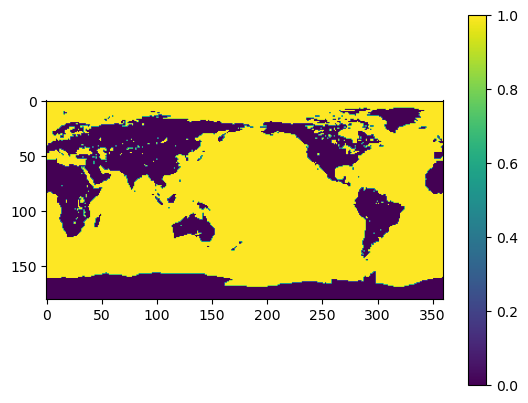

In [11]:
plt.imshow(nonan_mask_1deg)
plt.colorbar()

In [123]:
ds1 = ds.isel(time=1)['sea_surface_temperature'].to_numpy()

In [124]:
dt1 = ds.isel(time=1)['2m_temperature'].to_numpy()
stds, maxs, max_mean, y = stats(ds1)

mean : 286.56564
std  : 11.545512
[0.0, 0.00023263629, 0.00037256186, 0.00049541995, 0.0006280049, 0.0007479964, 0.0009726717, 0.0010856007, 0.0011986896, 0.0014225588, 0.0017516513, 0.0018495903, 0.002088594, 0.0022813194]
[0.0, 5.583954, 6.5428467, 8.375946, 9.78894, 10.053436, 12.831116, 13.289093, 14.707092, 14.767578, 16.429688, 15.927673, 15.982117, 16.596832]
[0.0, 0.16374587, 0.31988993, 0.46407235, 0.6180581, 0.75976956, 1.0287607, 1.1639758, 1.2987343, 1.5631906, 1.9555396, 2.061837, 2.3304374, 2.5659702]
[286.56564, 286.64816, 286.7072, 286.7439, 286.79663, 286.81412, 286.8497, 286.88913, 286.90134, 286.92035, 287.09726, 286.96896, 287.0035, 287.09985]


In [104]:
ds1 = ds.isel(time=1)['sea_surface_temperature'].to_numpy()
stds, maxs, max_mean, y = stats(ds1)

mean : 286.56564
std  : 11.545512
[0.0, 0.00023263629, 0.00037256186, 0.00049541995, 0.0006280049, 0.0007479964, 0.0009726717, 0.0010856007, 0.0011986896, 0.0014225588, 0.0017516513, 0.0018495903, 0.002088594, 0.0022813194]
[0.0, 5.583954, 6.5428467, 8.375946, 9.78894, 10.053436, 12.831116, 13.289093, 14.707092, 14.767578, 16.429688, 15.927673, 15.982117, 16.596832]
[0.0, 0.16374587, 0.31988993, 0.46407235, 0.6180581, 0.75976956, 1.0287607, 1.1639758, 1.2987343, 1.5631906, 1.9555396, 2.061837, 2.3304374, 2.5659702]
[286.56564, 286.64816, 286.7072, 286.7439, 286.79663, 286.81412, 286.8497, 286.88913, 286.90134, 286.92035, 287.09726, 286.96896, 287.0035, 287.09985]


In [131]:
m = mse(ds1)

mean : 286.56564
std  : 11.545512
1    0.0
2    0.0616580955684185
3    0.09086307883262634
4    0.1214461475610733
5    0.15283118188381195
6    0.18191640079021454
8    0.2359287589788437
9    0.26337966322898865
10    0.29055675864219666
12    0.3453134298324585
15    0.4251287579536438
16    0.4503503739833832
18    0.509438693523407
20    0.5557482838630676


In [132]:
m = mse(dt1)

mean : 275.53693
std  : 21.302368
1    0.0
2    0.22745423018932343
3    0.3307143449783325
4    0.4311830401420593
5    0.5247686505317688
6    0.6100825667381287
8    0.7655656337738037
9    0.8369329571723938
10    0.9130317568778992
12    1.051015019416809
15    1.2381141185760498
16    1.3071496486663818
18    1.4241628646850586
20    1.5434036254882812


In [134]:
m = mse(ds1)
m = mse(dt1)

mean : 286.56564
std  : 11.545512
1    0.0
2    0.005340438801795244
3    0.00786998774856329
4    0.010518903844058514
5    0.013237282633781433
6    0.015756044536828995
8    0.020434672012925148
9    0.022811923176050186
10    0.025165816769003868
12    0.029908878728747368
15    0.0368216373026371
16    0.03900616616010666
18    0.044124048203229904
20    0.04813509061932564
mean : 275.53693
std  : 21.302368
1    0.0
2    0.010677414014935493
3    0.015524769201874733
4    0.020241085439920425
5    0.024634288623929024
6    0.02863919921219349
8    0.03593805059790611
9    0.03928826004266739
10    0.04286057874560356
12    0.04933794215321541
15    0.058120954781770706
16    0.061361707746982574
18    0.06685468554496765
20    0.07245220988988876


In [84]:
sst1 = sst_1deg.isel(time=1)['sea_surface_temperature'].to_numpy()

In [78]:
mean = ds1[~np.isnan(ds1)].mean()
print(mean)

286.56564


In [81]:
std = ds1[~np.isnan(ds1)].std()
print(std)

11.545512


In [71]:
x = rearrange(ds1[:-1], '(h h1) (w w1) -> (h w) (h1 w1)', h1=4, w1=4)
t = x[~np.any(np.isnan(x),axis=1),:].std(axis=1)
print(t[t != 0.0].size / t.size)
print(t.mean())

0.8414382044593198
0.14197034


In [76]:
a = np.array([10,20])
a.std()/a.mean()

0.3333333333333333

In [75]:
a = np.array([1,2])
a.std()/a.mean()

0.3333333333333333

34191

In [65]:
t[t != 0.0].size / t.size

0.8414382044593198

In [72]:
x = rearrange(ds1[:-1], '(h h1) (w w1) -> (h w) (h1 w1)', h1=2, w1=2)
t = x[~np.any(np.isnan(x),axis=1),:].std(axis=1)
print(t[t != 0.0].size / t.size)
print(t.mean())

0.8306705844565256
0.066665575


In [40]:
x = rearrange(ds1[:-1], '(h h1) (w w1) -> (h w) (h1 w1)', h1=8, w1=8)
x[~np.any(np.isnan(x),axis=1),:].std(axis=1).mean()

0.27873433

In [130]:
def stats(ds1):
    global_mean = ds1[~np.isnan(ds1)].mean()
    global_std = ds1[~np.isnan(ds1)].std()
    print('mean :',global_mean)
    print('std  :', global_std)
    
    stds = []
    maxs = []
    max_mean = []
    means = []
    y = [1,2,3,4,5,6,8,9,10,12,15,16,18,20]
    for i in y:
        x = rearrange(ds1[:-1], '(h h1) (w w1) -> (h w) (h1 w1)', h1=i, w1=i)
        x_clean = x[~np.any(np.isnan(x),axis=1),:]
        # x_clean = (x_clean - global_mean)/global_std
        stds.append((x_clean.std(axis=1)/mean).mean())
        maxs.append((x_clean.max(axis=1) - x_clean.min(axis=1)).max())
        max_mean.append((x_clean.max(axis=1) - x_clean.min(axis=1)).mean())
        means.append(x_clean.mean(axis=1).mean())

    print(stds)
    print(maxs)
    print(max_mean)
    print(means)
    return stds, maxs, max_mean, y

In [133]:
def mse(ds1):
    global_mean = ds1[~np.isnan(ds1)].mean()
    global_std = ds1[~np.isnan(ds1)].std()
    print('mean :',global_mean)
    print('std  :', global_std)
    means = []
    # MSE = torch.nn.MSELoss()
    MSE = torch.nn.L1Loss()
    y = [1,2,3,4,5,6,8,9,10,12,15,16,18,20]
    for i in y:
        x = rearrange(ds1[:-1], '(h h1) (w w1) -> (h w) (h1 w1)', h1=i, w1=i)
        x_clean = x[~np.any(np.isnan(x),axis=1),:]
        x_clean = (x_clean - global_mean)/global_std
        coarse = x_clean.mean(axis=1)
        coarse_up = np.repeat(coarse[:, np.newaxis], i*i, axis=1)
        means.append(MSE(torch.tensor(x_clean),torch.tensor(coarse_up)).item())

    for j,i in enumerate(y):
        print(i, "  ", means[j])
    return means, y

In [112]:
i=4
x = rearrange(ds1[:-1], '(h h1) (w w1) -> (h w) (h1 w1)', h1=i, w1=i)

In [113]:
x_clean = x[~np.any(np.isnan(x),axis=1),:]
x_clean.shape

(40634, 16)

In [114]:
coarse = x_clean.mean(axis=1)
coarse.shape

(40634,)

In [115]:
coarse_up = np.repeat(coarse[:, np.newaxis], i*i, axis=1)
coarse_up.shape

(40634, 16)

In [94]:
print(maxs)
print(max_mean)

[0.0, 5.583954, 6.5428467, 8.375946, 9.78894, 10.053436, 12.831116, 13.289093, 14.707092, 14.767578, 16.429688, 15.927673, 15.982117, 16.596832]
[0.0, 0.16374587, 0.31988993, 0.46407235, 0.6180581, 0.75976956, 1.0287607, 1.1639758, 1.2987343, 1.5631906, 1.9555396, 2.061837, 2.3304374, 2.5659702]


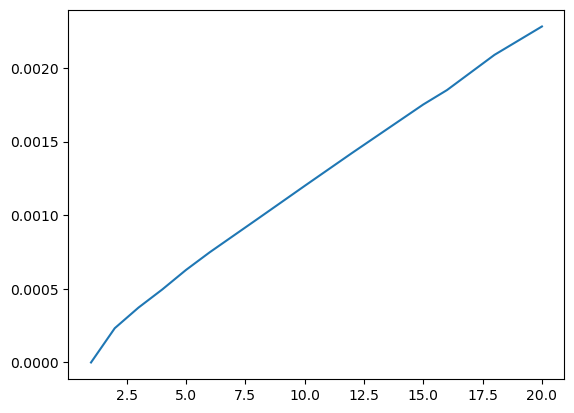

In [80]:
plt.plot(y,stds)

In [82]:
720/20


36.0

In [26]:
64800*16

1036800

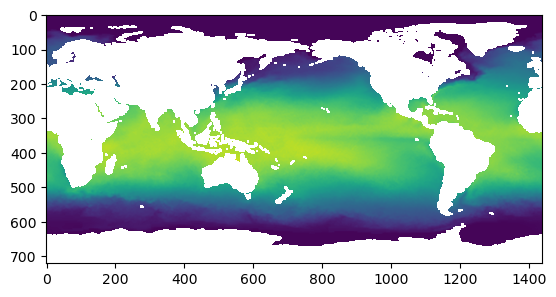

In [83]:
plt.imshow(ds1)

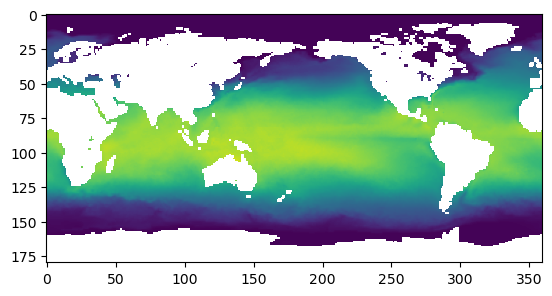

In [85]:
plt.imshow(sst1)

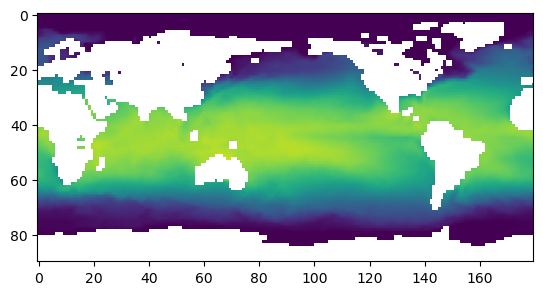

In [87]:
plt.imshow(ds.isel(time=1)['sea_surface_temperature'].coarsen(latitude=8,longitude=8,boundary='trim').mean().to_numpy())